# Stationary, Seasonal and Trend Time Series

## Stationarity
¿Cómo sabemos si una serie es estacionaria o no?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

/var/folders/09/sb1ltk754rvgdzk60z7z18400000gn/T/ipykernel_97531/2212353703.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
ap1=pd.read_csv('../data/ap1.csv')

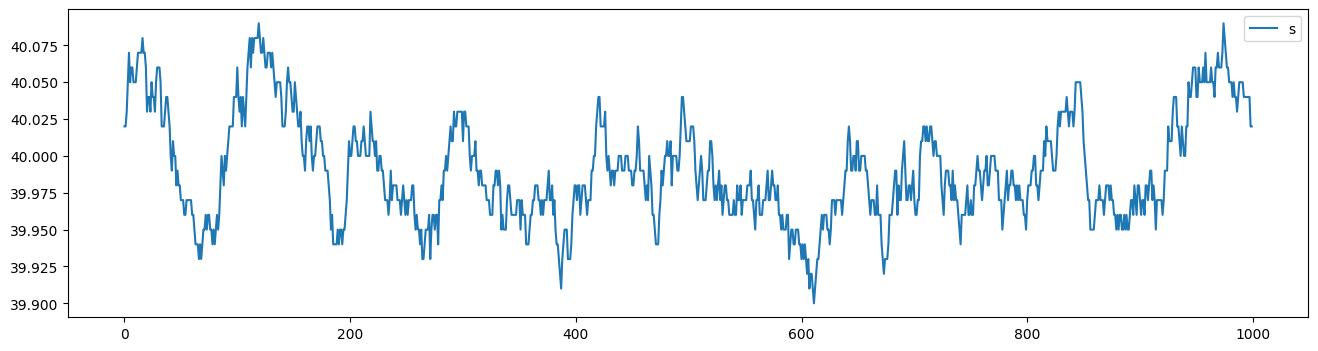

In [3]:
fig, ax = plt.subplots(figsize=(16,4))
for col in ap1.columns:
    ax.plot(ap1[col], label=col)
ax.legend()
plt.show()

De acuerdo a la serie de tiempo podríamos decir que es estacionaria, sin embargo no podemos estar 100% seguros de esto.

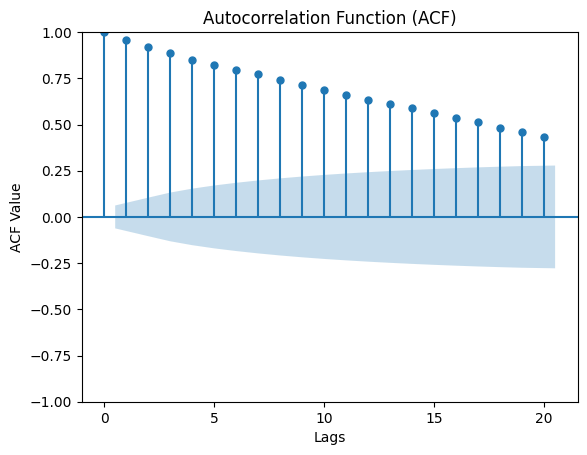

In [4]:
plot_acf(ap1['s'], lags=20)
plt.title("Autocorrelation Function (ACF)")
plt.xlabel("Lags")
plt.ylabel("ACF Value")
plt.show()

Así también, se ve que tiene una autocorrelación. Es necesario realizar una prueba para saber si es o no estacionaria.

### The ADF Test
Nos permite ver si una serie es estacionaria o no realizando una prueba de hipótesis.

$H_o:$ No es estacionaria   
$H_a:$ Es estacionaria

In [5]:
adfuller(ap1['s'])

(-4.284815443041227,
 0.000471890353653717,
 1,
 998,
 {'1%': -3.4369193380671, '5%': -2.864440383452517, '10%': -2.56831430323573},
 -6133.171699171065)

## Trends and seasonality
Infer and plot the trend of the air passenger dataset, taking into account the periodicity.

In [6]:
passengers=pd.read_csv('../data/air_passengers.csv')
passengers['Month'] = pd.to_datetime(passengers['Month']) # convert to datetime

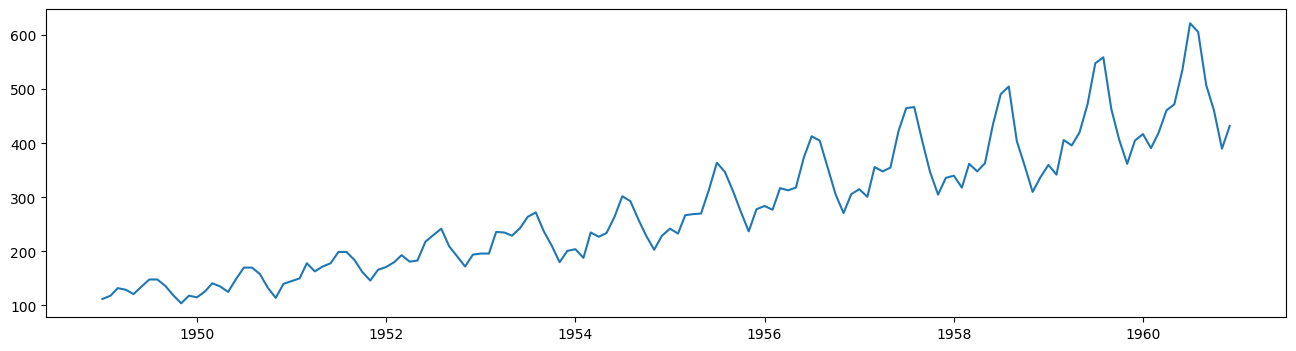

In [7]:
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(passengers['Month'],passengers['#Passengers'])

Using rolling to set windows size and visualize the trend

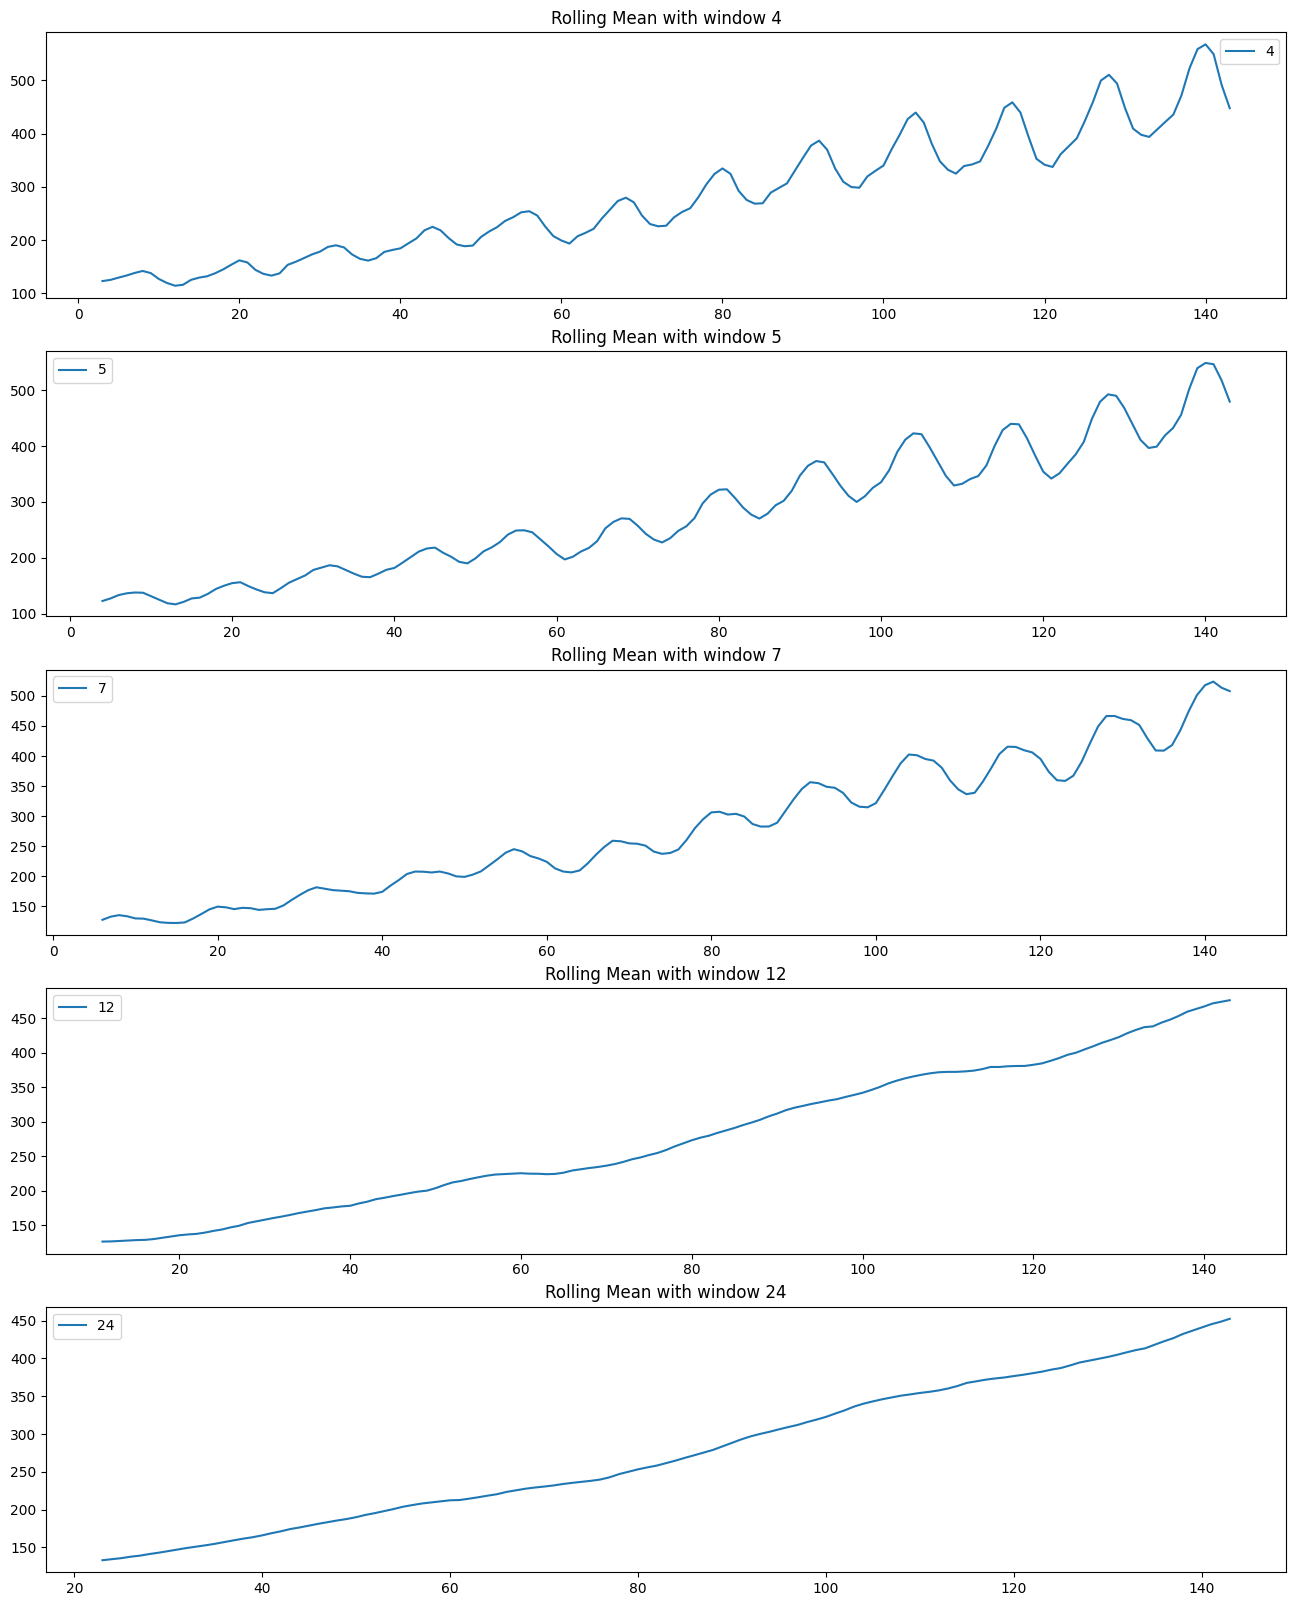

In [8]:
window = [4,5,7,12,24]

fig, ax = plt.subplots(nrows=len(window),figsize=(16,4*len(window)))

for i,window in enumerate(window):
    passengers['rolling_mean'] = passengers['#Passengers'].rolling(window=window).mean()
    ax[i].plot(passengers['rolling_mean'], label=window)
    ax[i].set_title(f"Rolling Mean with window {window}")
    ax[i].legend()

## Seasonal Decomposition

Las gráficas se pueden descomponer en:
- Tendencia
- Estacion
- Ruido

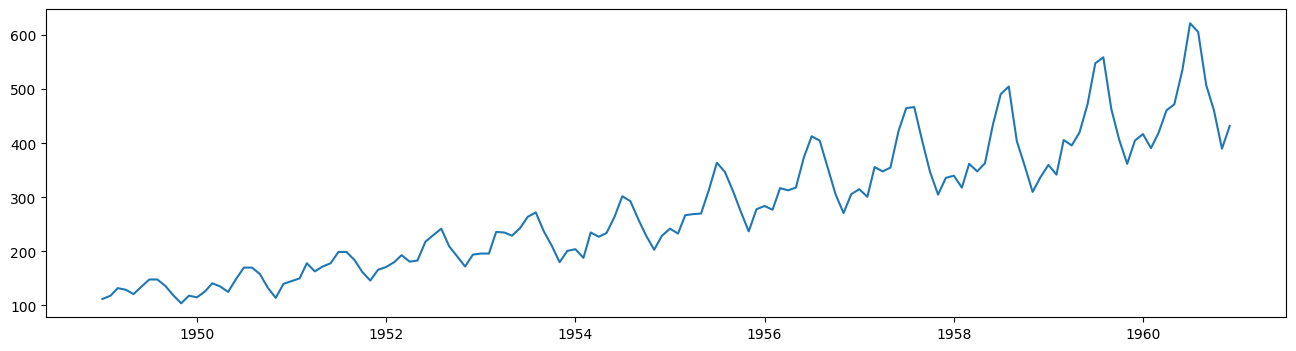

In [9]:
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(passengers['Month'],passengers['#Passengers'])
plt.show()

Ahora vamos a encontrar la estacionalidad, sin embargo, para esto hay que hacer varios pasos, primero le restamos a la gráfica original la tendencia (la cual se encuentra con rolling), con esto hallamos una grafica de estaciones pero que tiene ruido:

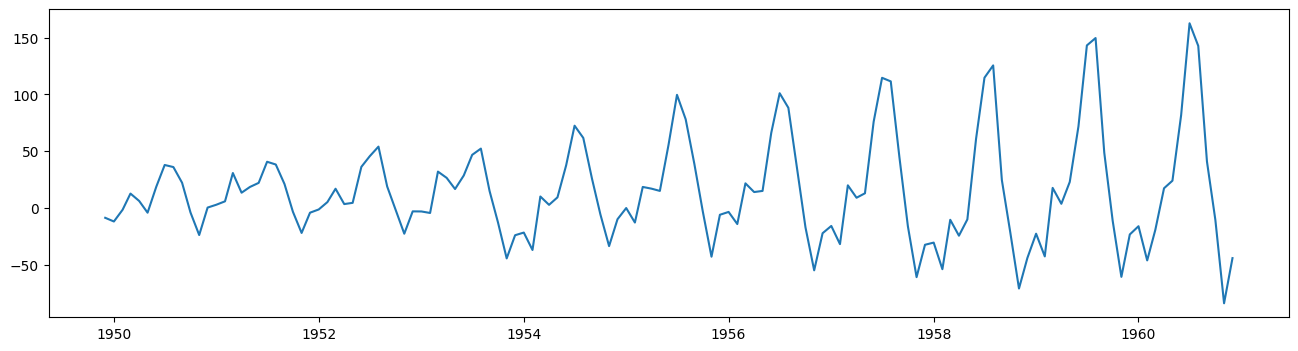

In [10]:
passengers['rolling_mean'] = passengers['#Passengers'].rolling(window=12).mean()
passengers['Season_Noise']=passengers['#Passengers']-passengers['rolling_mean']

fig, ax = plt.subplots(figsize=(16,4))
ax.plot(passengers['Month'],passengers['Season_Noise'])
plt.show()

Ahora debemos retirar ese ruido para quedarnos solamente con las estaciones, esto lo hacemos haciendo un grupo de cada mes por año. A continuación se muestra el gráfico de cómo se ve una sola estación:

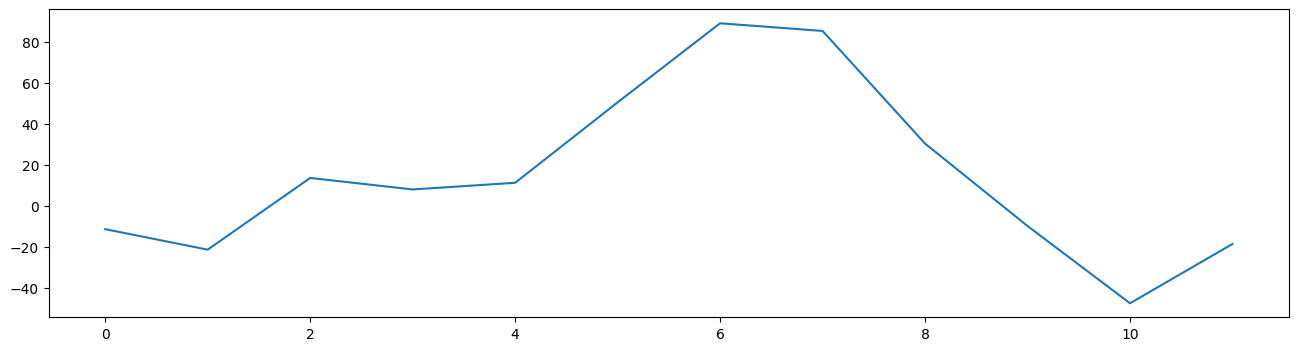

In [11]:
yearmean=[]
for x in range(12):
    yearmean.append(passengers['Season_Noise'][x::12].mean())
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(yearmean)
plt.show()

Ahora hay que graficar esta estación la cantidad de veces que se presente en la gráfica:

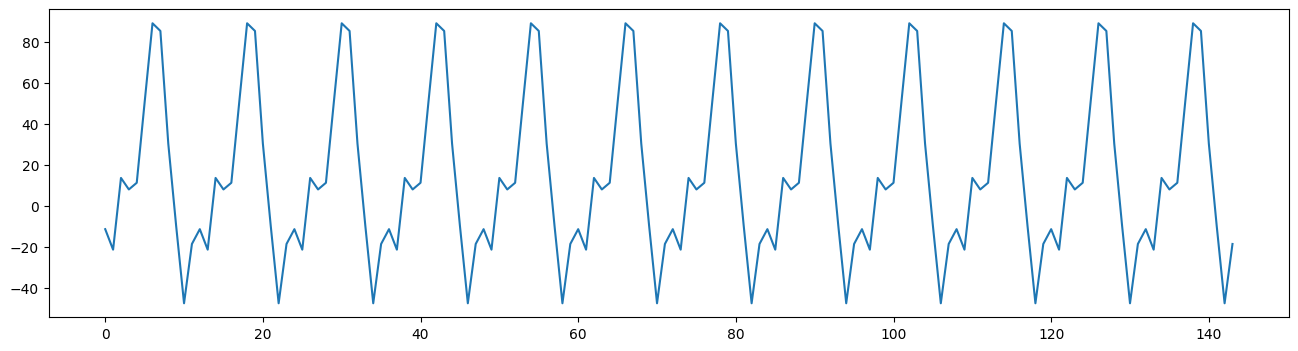

In [12]:
quantity=len(passengers)/12
season=np.tile(yearmean,int(quantity))
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(season)
plt.show()

### Gráfica completa

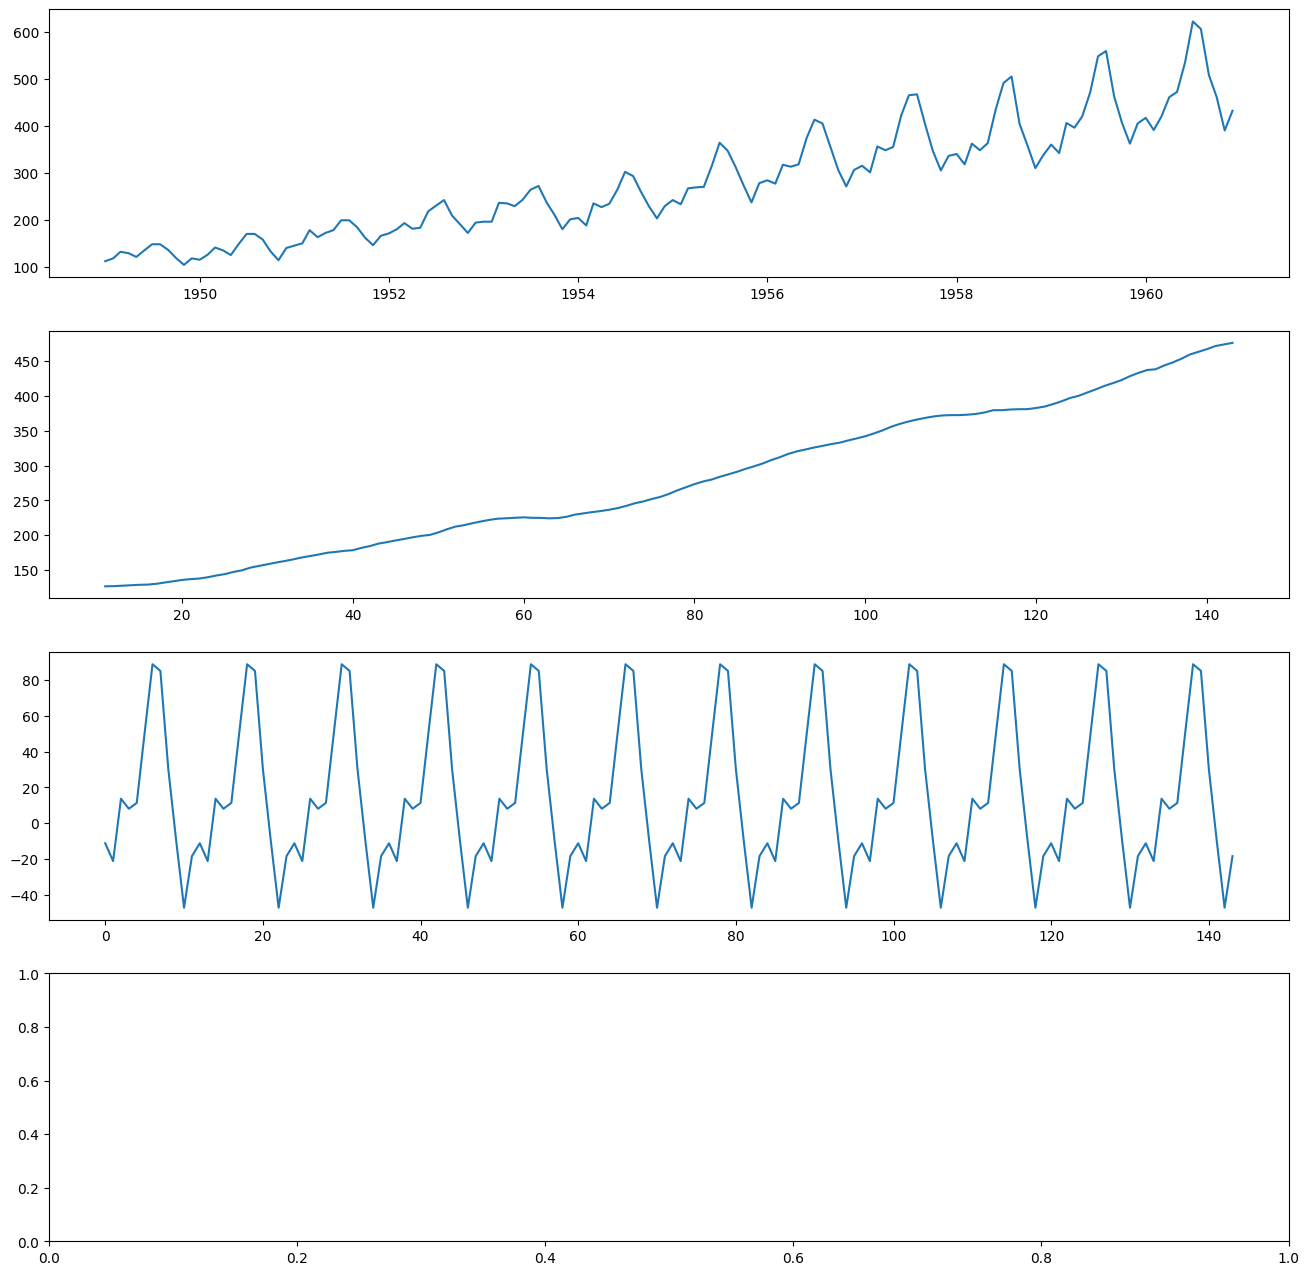

In [13]:
fig, axs = plt.subplots(nrows=4,figsize=(16,4*4))
axs[0].plot(passengers['Month'],passengers['#Passengers'])
axs[1].plot(passengers['rolling_mean'], label=window)
axs[2].plot(season)
plt.show()


## Función para hacer lo anterior

Se puede utilizar la función
`.decompose`

Sin embargo aveces es mejor la función `STL`de Stattsmodel, esta si tiene en cuenta la varianza.

In [14]:
import statsmodels.api as sm

passengers['Month'] = pd.to_datetime(passengers['Month'])
passengers.set_index('Month', inplace=True)
result = sm.tsa.seasonal_decompose(passengers['#Passengers'], model='additive')



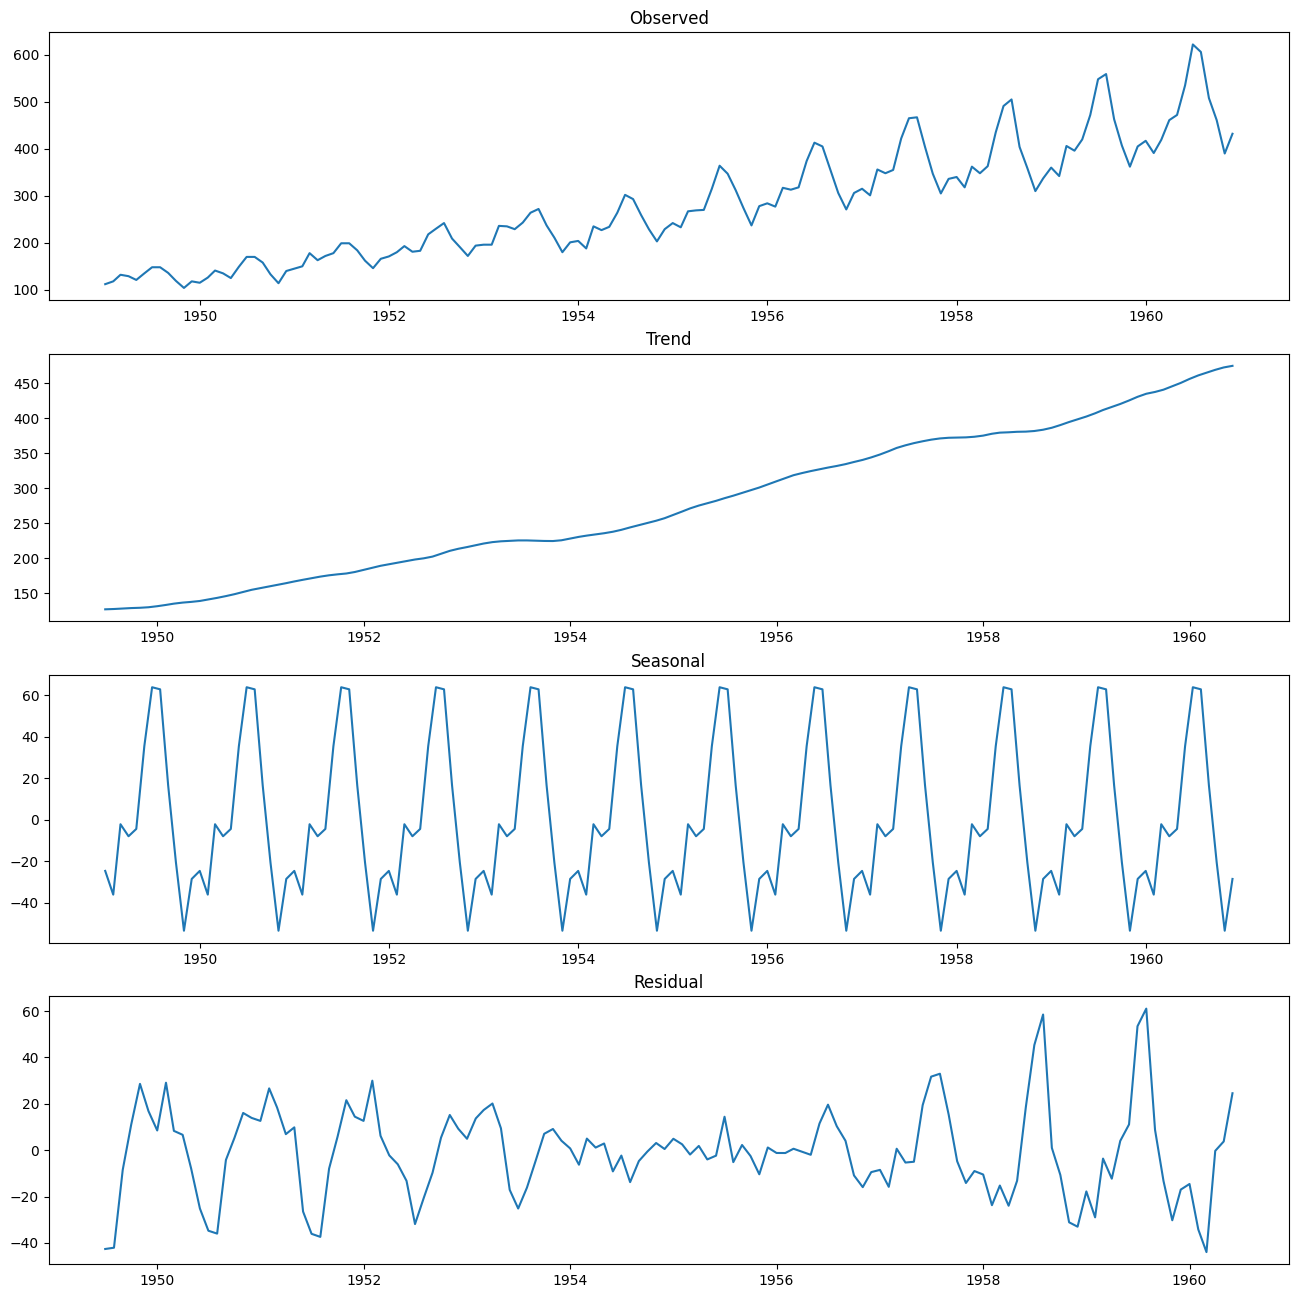

In [15]:
# Plot the decomposed components
fig, axs = plt.subplots(nrows=4, figsize=(16, 4*4))
axs[0].plot(result.observed)
axs[0].set_title('Observed')
axs[1].plot(result.trend)
axs[1].set_title('Trend')
axs[2].plot(result.seasonal)
axs[2].set_title('Seasonal')
axs[3].plot(result.resid)
axs[3].set_title('Residual')
plt.show()
